In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from bodotokenizer import tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Data Analysis

In [2]:
df=pd.read_csv("train.csv")
df

,S. No.,text,task_1
0,1,गोदाव खामानि मावओ बोला नो सानसे देरहा थारगोन,NOT
1,2,निखावरि सुबुंफोरा सिखाव,HOF
2,3,मा बिमा ख'र' परिबर्थननि खोथा फैखो बेयाव मोसौ,HOF
3,4,थोद जामबा सैमा साला मा मिसेस जाखो बेलाय,HOF
4,5,माखौ बकिबाय थादों नों बोरमा फानथा दम दंब्ला खा...,HOF
...,...,...,...
1674,1675,नोंलाय जामबा नोंबो सासे सनमान गैयै मानसिसो गिद...,HOF
1675,1676,एै मावजि लाब गैया दानो बनद खालामनायनि खोथा बुं...,HOF
1676,1677,सिखला फुरकव रपे खलामनांगव,HOF
1677,1678,सेनदेल खुबै नांगौलै सालाफोरखौ,HOF


,task_1
HOF,998
NOT,681


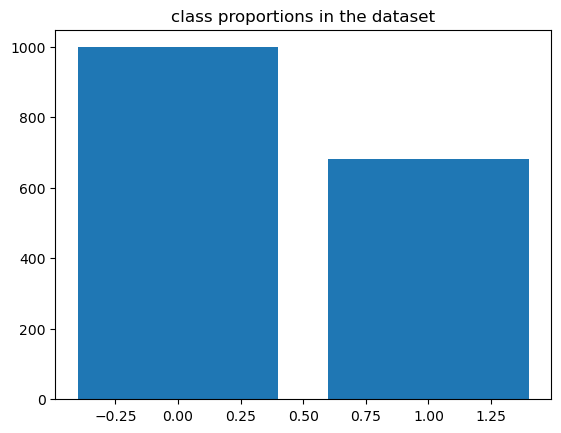

In [3]:
display(df['task_1'].value_counts().to_frame())
plt.bar([0,1],df['task_1'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

# Data Preprocessing

In [4]:
def tokenize_sentence(sen):
    return tokenize(sen)


In [5]:
sen1 = tokenize_sentence('सेनदेल खुबै नांगौलै सालाफोरखौ!')
sen1

'सेनदेल खुबै नांगौलै सालाफोरखौ !'

In [6]:
def remove_numbers_and_alphabets(text):
    cleaned_text = re.sub(r'[a-zA-Z]', '', text)  # Remove all alphabets (both uppercase and lowercase)
    cleaned_text = re.sub(r'\d+', '', cleaned_text)  # Remove all digits
    cleaned_text = re.sub(r'\u200C+', '', cleaned_text) # Remove Zero Width Non-Joiner (ZWNJ).
    cleaned_text = re.sub(r'[^\u0000-\uFFFF]', '', cleaned_text) # Remove Smilleys
    return cleaned_text


In [7]:
def remove_punctuation(text):
    punctuations = [',' , '।', '(', ')', '-', '.', "'", '!', '?', '/', ':']
    results = []

    sentences = text.split()
    for sen in sentences:
        if sen not in punctuations:
            results.append(sen)
            
    to_string1 = ' '.join(results)
    return to_string1


In [8]:
def remove_stop_words(text):
    
    stop_words = ['आरो', 'नाथाय', 'एबा', 'नंआब्ला', 'होनबा', 'होनब्लाबो', 'थाखाय', 'मानोना', 'मोन', 'यो', 'जै', 'बे', 'बै','आ', 'खौ', 'फ्रा', 'नों', 'नो', 'नै', 'बियो', 'एै', 'मा', 'जाय', 'या', 'जों', 'आव', 'आं' ]
    # stop_words = ['एबा', 'मा', 'जों', 'आं', 'नों' ]
    
    
    # 'आरो', 'नाथाय', 'एबा', 'नंआब्ला', 'होनबा', 'होनब्लाबो', 'थाखाय', 'मानोना', 'मोन', 'यो', 'जै', 'बै','आ', 'खौ', 'फ्रा' , 'नो', 'मा', 'जाय', 'या', 'जों', 'आं', 'नों' 
    
    # 'जै', 'बे', 'बै','आ', 'खौ', 'फ्रा', 'नों', 'नो', 'नै', 'बियो', 'एै', 'मा', 'जाय', 'या', 'जों', 'आव', 'आं'
    # 'जै', 'बे', 'बै','आ', 'खौ', 'फ्रा', 'नों', 'नो', 'नै', 'बियो', 'एै', 'मा', 'जाय', 'या', 'जों', 'आव', 'आं' 
    
    results = []

    sentences = text.split()
    
    for sen in sentences:
        if sen not in stop_words:
            results.append(sen)
            
    to_string1 = ' '.join(results)
    return to_string1


In [9]:
df["text"] = df["text"].apply(tokenize_sentence)
df['text'] = df['text'].apply(remove_numbers_and_alphabets)
df["text"] = df["text"].apply(remove_punctuation)
df["text"] = df["text"].apply(remove_stop_words)

# Vectorization

In [10]:
import re
def custom_analyzer(text):
    # split the text by spaces and remove any leading/trailing whitespaces
    tokens = re.split(r'\s+', text.strip())
    return tokens

In [11]:
x = np.array(df["text"])
y = np.array(df["task_1"])

vectorizer = TfidfVectorizer(analyzer=custom_analyzer,
                             sublinear_tf=True, norm='l2')
X = vectorizer.fit_transform(x)
X.shape

(1679, 4648)

In [12]:
cv = CountVectorizer(analyzer=custom_analyzer)
X_cv = cv.fit_transform(x)

In [13]:
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)
# y_encoded

In [14]:
pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

,'पिसा,अ',अँगव,अंग,अंगकव,अंगक्व,अंगखव,अंगखौ,अंगी,अंजलि,...,ह्वैगुन,ह्व्गुण,ूंगकारखवइ,ेकस्तस्य,ज़ुबीन,ज़ेन्डया,फ़ाना,फ़ैल,फ़ोन,फ़्वखव
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
pd.DataFrame(X_cv.toarray(), columns = cv.get_feature_names_out())

,'पिसा,अ',अँगव,अंग,अंगकव,अंगक्व,अंगखव,अंगखौ,अंगी,अंजलि,...,ह्वैगुन,ह्व्गुण,ूंगकारखवइ,ेकस्तस्य,ज़ुबीन,ज़ेन्डया,फ़ाना,फ़ैल,फ़ोन,फ़्वखव
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Support Vector

TFIDF

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=2020)

clf = SVC(class_weight="balanced")

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# y_pred_original = le.inverse_transform(y_pred)
# y_pred_original

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8195329087048833
Classification Report:
               precision    recall  f1-score   support

         HOF       0.84      0.86      0.85       282
         NOT       0.79      0.76      0.77       189

    accuracy                           0.82       471
   macro avg       0.81      0.81      0.81       471
weighted avg       0.82      0.82      0.82       471



CountVectorizer

In [17]:
# count vec
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y, test_size=0.28, random_state=2020)

clf = SVC(class_weight="balanced")

clf.fit(X_train_cv, y_train_cv)

y_pred_cv = clf.predict(X_test_cv)

print("Accuracy:", accuracy_score(y_test_cv, y_pred_cv))
print("Classification Report:\n", classification_report(y_test_cv, y_pred_cv))

Accuracy: 0.7579617834394905
Classification Report:
               precision    recall  f1-score   support

         HOF       0.81      0.77      0.79       282
         NOT       0.68      0.74      0.71       189

    accuracy                           0.76       471
   macro avg       0.75      0.75      0.75       471
weighted avg       0.76      0.76      0.76       471



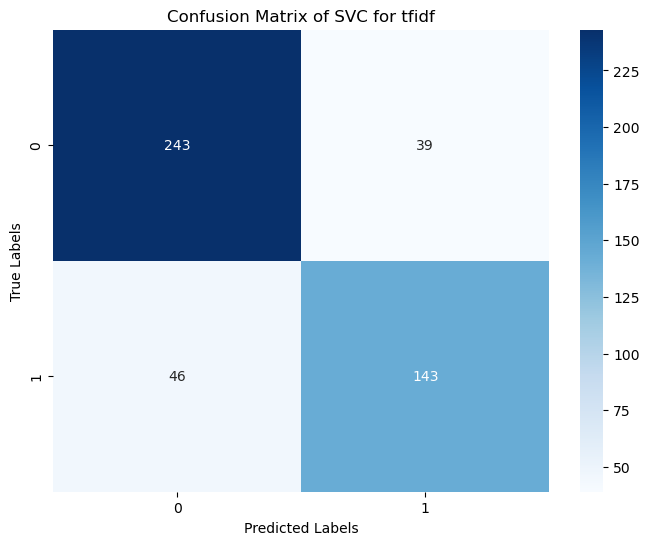

In [18]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Create a colorful confusion matrix plot with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of SVC for tfidf')
plt.show()

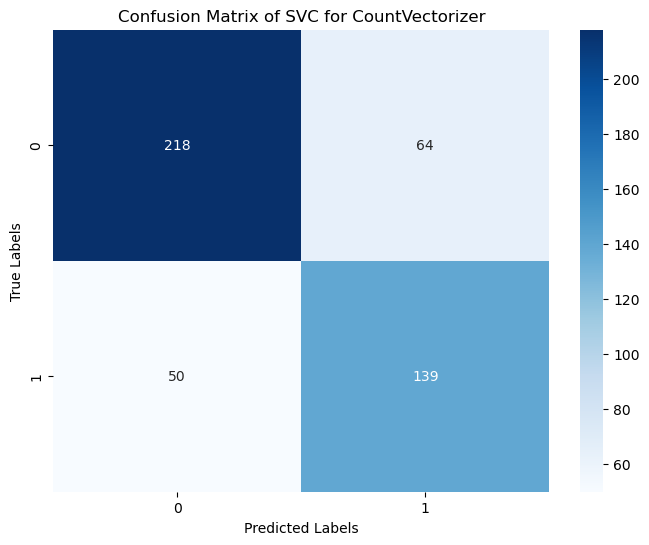

In [19]:
cm = confusion_matrix(y_test_cv, y_pred_cv)

# Create a colorful confusion matrix plot with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of SVC for CountVectorizer')
plt.show()

# Random Forest 

TFIDF

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.7876857749469215
Classification Report:
               precision    recall  f1-score   support

         HOF       0.80      0.87      0.83       282
         NOT       0.77      0.67      0.72       189

    accuracy                           0.79       471
   macro avg       0.78      0.77      0.77       471
weighted avg       0.79      0.79      0.78       471



CountVectorizer

In [21]:
rf_cv = RandomForestClassifier()
rf_cv.fit(X_train_cv, y_train_cv)
y_pred_rf_cv = rf_cv.predict(X_test_cv)
print("Accuracy:", accuracy_score(y_test_cv, y_pred_rf_cv))
print("Classification Report:\n", classification_report(y_test_cv, y_pred_rf_cv))

Accuracy: 0.7834394904458599
Classification Report:
               precision    recall  f1-score   support

         HOF       0.88      0.74      0.80       282
         NOT       0.69      0.85      0.76       189

    accuracy                           0.78       471
   macro avg       0.78      0.79      0.78       471
weighted avg       0.80      0.78      0.79       471



# Logistic Regression

TFIDF

In [22]:
model=LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.8046709129511678
Classification Report:
               precision    recall  f1-score   support

         HOF       0.86      0.80      0.83       282
         NOT       0.73      0.81      0.77       189

    accuracy                           0.80       471
   macro avg       0.80      0.81      0.80       471
weighted avg       0.81      0.80      0.81       471



CountVectorizer

In [23]:
model_cv=LogisticRegression(class_weight="balanced")
model_cv.fit(X_train_cv, y_train_cv)
y_pred2_cv = model_cv.predict(X_test_cv)
print("Accuracy:", accuracy_score(y_test_cv, y_pred2_cv))
print("Classification Report:\n", classification_report(y_test_cv, y_pred2_cv))

Accuracy: 0.7876857749469215
Classification Report:
               precision    recall  f1-score   support

         HOF       0.88      0.75      0.81       282
         NOT       0.69      0.85      0.76       189

    accuracy                           0.79       471
   macro avg       0.79      0.80      0.79       471
weighted avg       0.80      0.79      0.79       471



# Decision Trees

TFIDF

In [24]:
model2=DecisionTreeClassifier(class_weight="balanced")
model2.fit(X_train, y_train)
y_pred3 = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))

Accuracy: 0.7664543524416136
Classification Report:
               precision    recall  f1-score   support

         HOF       0.84      0.76      0.79       282
         NOT       0.68      0.78      0.73       189

    accuracy                           0.77       471
   macro avg       0.76      0.77      0.76       471
weighted avg       0.78      0.77      0.77       471



In [25]:
model2_cv=DecisionTreeClassifier(class_weight="balanced")
model2_cv.fit(X_train_cv, y_train_cv)
y_pred3_cv = model2_cv.predict(X_test_cv)
print("Accuracy:", accuracy_score(y_test_cv, y_pred3_cv))
print("Classification Report:\n", classification_report(y_test_cv, y_pred3_cv))

Accuracy: 0.7664543524416136
Classification Report:
               precision    recall  f1-score   support

         HOF       0.85      0.74      0.79       282
         NOT       0.68      0.80      0.73       189

    accuracy                           0.77       471
   macro avg       0.76      0.77      0.76       471
weighted avg       0.78      0.77      0.77       471



### Test Data Loading and Preprocessing

In [26]:
test_data = pd.read_csv('test.csv')

In [27]:
sample = test_data.copy()
sample

,S. No.,text
0,1,BPF बानाय लांनाय लामाया 5 बोसोरानो जोरासै
1,2,"बै समाव माबेयाव हाबसोनानै दंमोन नोंलाय, दाना ब..."
2,3,बे थांखिखौ मिनिग्रापोरा हारिखौ लेवारपोरबायदि थ...
3,4,मोसौ खुगायाव एमफौ नांबाय नोंनाव सैमा
4,5,2003आव BTC गोरोबथा जादों बेनि थाखाय बो थोजासे ...
...,...,...
415,416,आं आनो खाजा होआखै मोन
416,417,बियो आंखौ बिनि बिमा बिफा बुथारनायनि थाखाय दायन...
417,418,राहुलआ गावनि फोरोंगिरिखौ मान होआ
418,419,राकेशआ गावनि फोरोंगिरिखौ मान होआ


In [28]:
sample['text'] = sample['text'].apply(tokenize_sentence)
sample['text'] = sample['text'].apply(remove_numbers_and_alphabets)
sample['text'] = sample['text'].apply(remove_punctuation)
sample['text'] = sample['text'].apply(remove_stop_words)

In [29]:
X2 = sample['text']

In [30]:
X2_test_tfidf = vectorizer.transform(X2)

### Since 'Support Vector Machine' TFIDF version gives us the best accuracy i.e. 82% we use that model

In [31]:
test_y_pred=clf.predict(X2_test_tfidf)

In [32]:
sample['task_1'] = test_y_pred
sample.drop(columns=['text'],axis=1,inplace=True)
sample

,S. No.,task_1
0,1,NOT
1,2,NOT
2,3,NOT
3,4,NOT
4,5,NOT
...,...,...
415,416,NOT
416,417,NOT
417,418,NOT
418,419,NOT


In [33]:
sample.to_csv('clf_sample_1.csv', index=False)